<h1 align = center>Exploratory Data Analysis </h1>
<ul>The main objective here is the identification of primary independent variables that can significantly modify the target variable "price". Only those significant variables will be used for model building in the next part using Multipe Linear Regression.</ul>

In [1]:
# importing all the important libraries at once
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
#ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the file 
file = "D:/Python_DataScience/pandas-demo/Project1/clean0_project_1.csv "
df = pd.read_csv(file)
df = df.iloc[:,1:]

In [3]:
# printing the first few rows
df.head(5)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
# renaming the columns 
df.rename(columns={"fuel-type":"fuel_type", "num-of-doors": "num_of_doors","body-style":"body_style",
         "drive-wheels":"drive_wheels","engine-location":"engine_location","wheel-base":"wheel_base", "curb-weight":"curb_weight","engine-type":"engine_type",
         "num-of-cylinders":"num_of_cylinders", "engine-size":"engine_size","fuel-system":"fuel_system","compression-ratio":"compression_ratio", "peak-rpm":"peak_rpm","city-mpg":"city_mpg","highway-mpg":"highway_mpg"},inplace = True)
df.head(5)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Checking the number of row entries, data type of each column entries and the null values for each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    object 
 2   fuel_type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num_of_doors       201 non-null    object 
 5   body_style         201 non-null    object 
 6   drive_wheels       201 non-null    object 
 7   engine_location    201 non-null    object 
 8   wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb_weight        201 non-null    int64  
 13  engine_type        201 non-null    object 
 14  num_of_cylinders   201 non-null    object 
 15  engine_size        201 non-null    int64  
 16  fuel_system        201 non

## Descriptive Statistics

In [6]:
# showing the descriptive statistics for continuous  variables
df.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330214,3.248099,10.164279,103.474641,5117.437274,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268097,0.322089,4.004965,37.375794,478.143941,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.100000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5154.549539,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


The above table represents most of the details pertaining to the continuous variables such as mean, median, mode, quartiles, inter-quartile range, minimum, maximum and standard deviation for all the continuous variables. 
The target variable for this dataset is price of cars.

In [7]:
# descriptive statistics for the categorical variables 
df.describe(include=object)

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


The above table represents details pertaining to the categorical variables such as count, unique values in each variable, the modal value and its frequency.

# Dealing with categorical variables:

Let us deal with each categorical variable and decide whether the levels in each categorical variable have mean "price" (target variable) significantly different than the other levels within the same categorical variable using ANOVA and Tukey Cramer's Test.

### Categorical variable 1: "make":
Since we have 22 different values for "make" using ANOVA will be lengthy and complicated. 

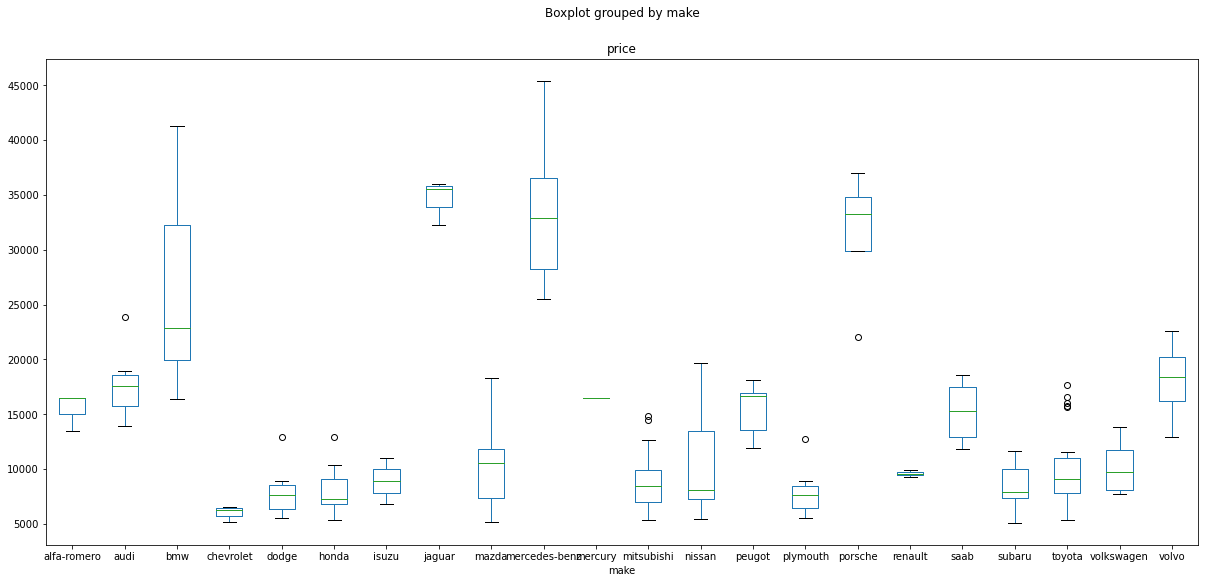

In [8]:
# plotting the boxplots for "body_style"
fig, ax = plt.subplots(figsize=(20,9))
fig = df.boxplot('price', 'make', ax=ax, grid=False)

In [9]:
# performing ANOVA on "body_style"
rehab_lm = ols('price ~ C(make)', data=df).fit()
table9 = anova_lm(rehab_lm)
print(table9)

             df        sum_sq       mean_sq          F        PR(>F)
C(make)    21.0  1.005272e+10  4.787009e+08  33.232103  1.068343e-50
Residual  179.0  2.578454e+09  1.440477e+07        NaN           NaN


In [10]:
# tukey kramer test for comparing which two levels have significantly different means
#print (sm.stats.multicomp.pairwise_tukeyhsd(df["price"], df["make"], alpha=0.05))

Speaking by looking at the box plots, we can see that there is a significant difference in the means between the 22 different levels of "make" variable. Thus no need to perform tukey cramer test as it leads to 22C2 observations. Thus, the conclusion is that "make" is a significant independent categorical variable that affects the "price" variable.

### Categorical variable 2: "body_style":
Here we have 5 different fields for this variable. Let us see if there is significant difference in the means for different levels for this variable.

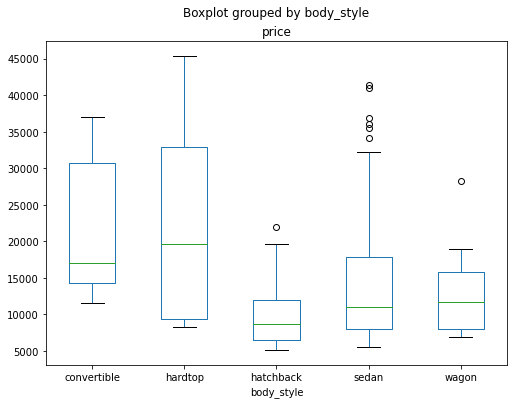

In [11]:
# plotting the boxplots for "body_style"
fig, ax = plt.subplots(figsize=(8,6))
fig = df.boxplot('price', 'body_style', ax=ax, grid=False)

In [12]:
# performing ANOVA on "body_style"
rehab_lm = ols('price ~ C(body_style)', data=df).fit()
table9 = anova_lm(rehab_lm)
print(table9)

                  df        sum_sq       mean_sq         F        PR(>F)
C(body_style)    4.0  1.983646e+09  4.959114e+08  9.128752  8.779795e-07
Residual       196.0  1.064753e+10  5.432412e+07       NaN           NaN


#### The "body_style" variable has F-value which indicates that not all means are approximately same. The Tukey Cramer's test is shown below:

In [13]:
# tukey kramer test for comparing which two levels have significantly different means
print (sm.stats.multicomp.pairwise_tukeyhsd(df["price"], df["body_style"], alpha=0.05))

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1     group2    meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------------
convertible   hardtop       318.0    0.9 -10641.9651 11277.9651  False
convertible hatchback -11933.0588 0.0018 -20575.8008 -3290.3168   True
convertible     sedan  -7430.7447 0.1214 -15976.0231  1114.5338  False
convertible     wagon    -9518.54 0.0395 -18744.2753  -292.8047   True
    hardtop hatchback -12251.0588  0.001  -19836.365 -4665.7526   True
    hardtop     sedan  -7748.7447  0.038 -15222.8108  -274.6785   True
    hardtop     wagon    -9836.54 0.0105  -18079.966  -1593.114   True
  hatchback     sedan   4502.3141 0.0016   1271.5527  7733.0756   True
  hatchback     wagon   2414.5188 0.6114  -2332.0828  7161.1205  False
      sedan     wagon  -2087.7953 0.6914  -6654.5252  2478.9345  False
----------------------------------------------------------------------


### Categorical variable 3: "aspiration"

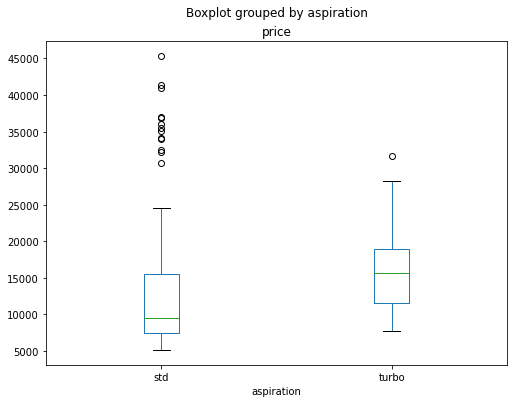

In [14]:
# plotting the boxplot for "aspiration" variable 
fig, ax = plt.subplots(figsize=(8,6))
fig = df.boxplot('price', 'aspiration', ax=ax, grid=False)

In [15]:
# performing ANOVA for "aspiration" variable 
rehab_lm = ols('price ~ C(aspiration)', data=df).fit()
table9 = anova_lm(rehab_lm)
print(table9)

                  df        sum_sq       mean_sq         F    PR(>F)
C(aspiration)    1.0  4.073355e+08  4.073355e+08  6.631286  0.010746
Residual       199.0  1.222384e+10  6.142632e+07       NaN       NaN


#### The F-value is 6.6 which gives us enough evidence to conclude that not all means are the same for the "aspiraion" variable.

In [16]:
# tukey kramer test for comparing which two groups have significantly different means
print (sm.stats.multicomp.pairwise_tukeyhsd(df["price"], df["aspiration"], alpha=0.05))

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
   std  turbo 3712.6237 0.0107 869.6072 6555.6403   True
--------------------------------------------------------


### Categorical Variable 4: "fuel_type"

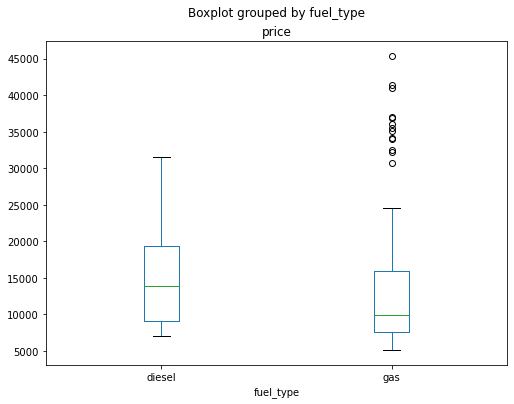

In [17]:
# plotting the boxplots for the "fuel_type" variable
fig, ax = plt.subplots(figsize=(8,6))
fig = df.boxplot('price', 'fuel_type', ax=ax, grid=False)

In [18]:
# performing ANOVA on the "fuel_type" variable
rehab_lm = ols('price ~ C(fuel_type)', data=df).fit()
table9 = anova_lm(rehab_lm)
print(table9)

                 df        sum_sq       mean_sq        F    PR(>F)
C(fuel_type)    1.0  1.537432e+08  1.537432e+08  2.45202  0.118963
Residual      199.0  1.247743e+10  6.270065e+07      NaN       NaN


Since, the F-value is 2.4 we are not sure about commenting on the difference in the means between the levels in the "fuel_type" variable. The below Tukey Cramer test indicates that the means are not different significantly.

In [19]:
# tukey kramer test for comparing which two groups have significantly different means
print (sm.stats.multicomp.pairwise_tukeyhsd(df["price"], df["fuel_type"], alpha=0.05))

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff  p-adj   lower    upper   reject
--------------------------------------------------------
diesel    gas -2921.7412 0.119 -6601.142 757.6597  False
--------------------------------------------------------


### Categorical variable 5: "num_of_doors"

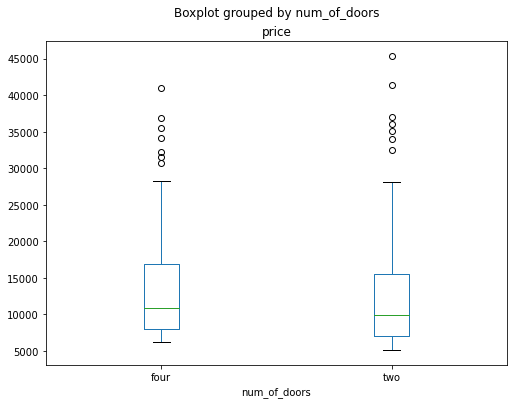

In [20]:
# plotting the boxplots for "num_of_doors" variable
fig, ax = plt.subplots(figsize=(8,6))
fig = df.boxplot('price', 'num_of_doors', ax=ax, grid=False)

In [21]:
# performing ANOVA for "num_of_doors" variable
rehab_lm = ols('price ~ C(num_of_doors)', data=df).fit()
table9 = anova_lm(rehab_lm)
print(table9)

                    df        sum_sq       mean_sq         F    PR(>F)
C(num_of_doors)    1.0  2.274569e+07  2.274569e+07  0.358997  0.549745
Residual         199.0  1.260843e+10  6.335893e+07       NaN       NaN


#### Since, the F-value is 0.35, we can safely sy that the means of the levels involved in "num_of_doors" variable are almost the same statistically. The Tukey Cramers test below confirms the same.

In [22]:
# tukey kramer test for comparing which two groups have significantly different means
print (sm.stats.multicomp.pairwise_tukeyhsd(df["price"], df["num_of_doors"], alpha=0.05))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
  four    two -679.9069 0.5557 -2917.6032 1557.7894  False
----------------------------------------------------------


### Categorical Variable 6: "drive_wheels"

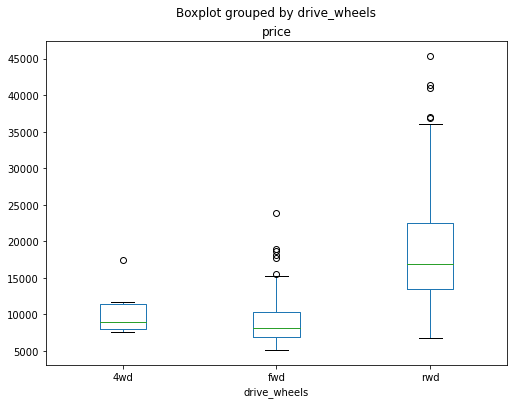

In [23]:
# plotting the boxplots for "drive_wheels" variable
fig, ax = plt.subplots(figsize=(8,6))
fig = df.boxplot('price', 'drive_wheels', ax=ax, grid=False)

In [24]:
# performing ANOVA on the "drive_wheels" variable
rehab_lm = ols('price ~ C(drive_wheels)', data=df).fit()
table9 = anova_lm(rehab_lm)
print(table9)

                    df        sum_sq       mean_sq          F        PR(>F)
C(drive_wheels)    2.0  5.141172e+09  2.570586e+09  67.954065  3.394544e-23
Residual         198.0  7.490001e+09  3.782829e+07        NaN           NaN


#### Since, the F-value is 67.95, it is safe to say that not all the means in the levels of "drive_wheels" are the same. To look at which levels have different means, Tukey Cramers test is shown below.

In [25]:
# tukey kramer test for comparing which two groups have significantly different means
print (sm.stats.multicomp.pairwise_tukeyhsd(df["price"], df["drive_wheels"], alpha=0.05))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   4wd    fwd  -996.2203 0.8908 -6302.8676  4310.4269  False
   4wd    rwd  9516.6133  0.001  4114.2428 14918.9838   True
   fwd    rwd 10512.8337  0.001  8367.8304  12657.837   True
------------------------------------------------------------


#### In the above Tukey Cramer test, "4wd" and "fwd don't have significant difference between the means. However, for the remaining pairs there is a significant difference. 

### Categorical Variable 7: "engine_location"

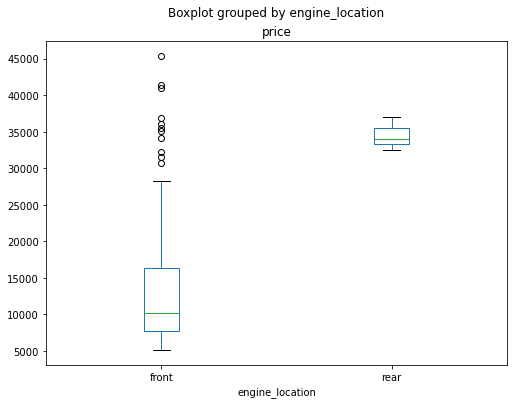

In [26]:
# plotting the boxplot for "engine_location"
fig, ax = plt.subplots(figsize=(8,6))
fig = df.boxplot('price', 'engine_location', ax=ax, grid=False)

In [27]:
# performing ANOVA on "engine_location" 
rehab_lm = ols('price ~ C(engine_location)', data=df).fit()
table9 = anova_lm(rehab_lm)
print(table9)

                       df        sum_sq       mean_sq         F    PR(>F)
C(engine_location)    1.0  1.384401e+09  1.384401e+09  24.49555  0.000002
Residual            199.0  1.124677e+10  5.651644e+07       NaN       NaN


#### The F-value is 24.49, which is significant enough to conclude that not all means are the same for "engine_location" variable.

In [28]:
# tukey kramer test for comparing which two groups have significantly different means
print (sm.stats.multicomp.pairwise_tukeyhsd(df["price"], df["engine_location"], alpha=0.05))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
 front   rear 21643.9141 0.001 13020.2955 30267.5328   True
-----------------------------------------------------------


### Categorical variable 8: "engine_type"

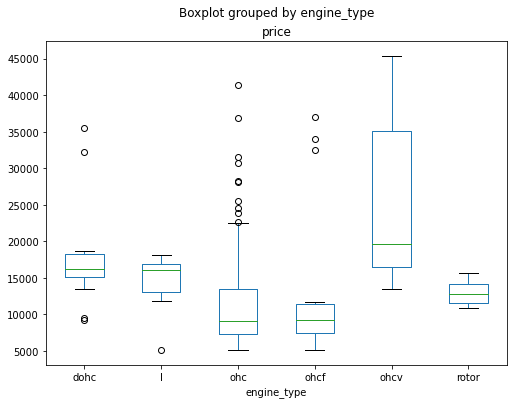

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
fig = df.boxplot('price', 'engine_type', ax=ax, grid=False)

In [30]:
# performing ANOVA on "engine_variable" 
rehab_lm = ols('price ~ C(engine_type)', data=df).fit()
table9 = anova_lm(rehab_lm)
print(table9)

                   df        sum_sq       mean_sq         F        PR(>F)
C(engine_type)    5.0  2.545911e+09  5.091822e+08  9.845111  2.086549e-08
Residual        195.0  1.008526e+10  5.171929e+07       NaN           NaN


#### The F-value is 9.8 which is significant enough to conclude that not all means are the same for "engine_type" variable.

In [31]:
# tukey kramer test for comparing which two groups have significantly different means
print (sm.stats.multicomp.pairwise_tukeyhsd(df["price"], df["engine_type"], alpha=0.05))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
  dohc      l  -3488.8333 0.8219 -11939.3117  4961.6451  False
  dohc    ohc   -6549.058 0.0325 -12766.7918  -331.3243   True
  dohc   ohcf  -4377.8167 0.6021 -12394.6444   3639.011  False
  dohc   ohcv   6981.9679 0.1527  -1304.4079 15268.3438  False
  dohc  rotor  -5096.4167 0.7995 -17047.1978  6854.3645  False
     l    ohc  -3060.2247 0.6911  -9277.9585  3157.5091  False
     l   ohcf   -888.9833    0.9   -8905.811  7127.8444  False
     l   ohcv  10470.8013 0.0047   2184.4255 18757.1771   True
     l  rotor  -1607.5833    0.9 -13558.3645 10343.1978  False
   ohc   ohcf   2171.2414  0.865  -3442.9509  7785.4336  False
   ohc   ohcv   13531.026  0.001    7538.226  19523.826   True
   ohc  rotor   1452.6414    0.9  -9038.8217 11944.1045  False
  ohcf   ohcv  11359.7846  0.001   3516.1269 19203.4423

### Categorical variable 9: "num_of_cylinders" 

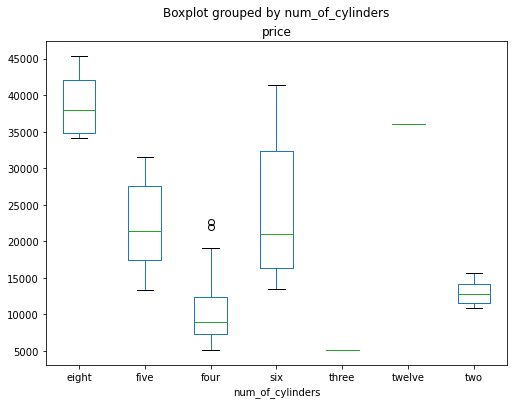

In [32]:
# plotting the boxplot for "num_of_cylinders" variable
fig, ax = plt.subplots(figsize=(8,6))
fig = df.boxplot('price', 'num_of_cylinders', ax=ax, grid=False)

In [33]:
# performing ANOVA for "num_of_cylinders" 
rehab_lm = ols('price ~ C(num_of_cylinders)', data=df).fit()
table9 = anova_lm(rehab_lm)
print(table9)

                        df        sum_sq       mean_sq          F  \
C(num_of_cylinders)    6.0  7.951727e+09  1.325288e+09  54.943653   
Residual             194.0  4.679446e+09  2.412085e+07        NaN   

                           PR(>F)  
C(num_of_cylinders)  2.870145e-39  
Residual                      NaN  


In [34]:
# tukey kramer test for comparing which two groups have significantly different means
print (sm.stats.multicomp.pairwise_tukeyhsd(df["price"], df["num_of_cylinders"], alpha=0.05))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
 eight   five    -16892.4  0.001 -25549.5007  -8235.2993   True
 eight   four -28596.8025  0.001 -36006.0067 -21187.5984   True
 eight    six -15228.1667  0.001 -23130.9822  -7325.3511   True
 eight  three    -33749.0  0.001 -50109.3825 -17388.6175   True
 eight twelve     -2900.0    0.9 -19260.3825  13460.3825  False
 eight    two    -25880.0  0.001 -36227.2144 -15532.7856   True
  five   four -11704.4025  0.001 -16476.9126  -6931.8925   True
  five    six   1664.2333    0.9  -3843.4921   7171.9588  False
  five  three    -16856.6 0.0212 -32203.9992  -1509.2008   True
  five twelve     13992.4 0.0996  -1354.9992  29339.7992  False
  five    two     -8987.6 0.0362 -17644.7007   -330.4993   True
  four    six  13368.6359  0.001  10161.4636  16575.8081   True
  four  three  -5152.1975    0.9 -19831.

### Categorical Variable 10: "fuel_system"

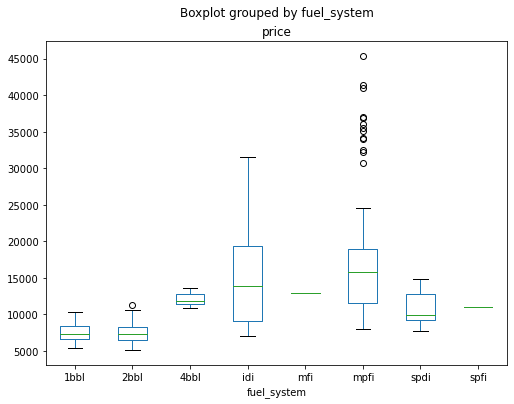

In [35]:
# performing ANOVA on "fuel_system" variable
fig, ax = plt.subplots(figsize=(8,6))
fig = df.boxplot('price', 'fuel_system', ax=ax, grid=False)

In [36]:
# perforing ANOVA on the "fuel_system" variable 
rehab_lm = ols('price ~ C(fuel_system)', data=df).fit()
table9 = anova_lm(rehab_lm)
print(table9)

                   df        sum_sq       mean_sq          F        PR(>F)
C(fuel_system)    7.0  4.455276e+09  6.364679e+08  15.024444  1.314258e-15
Residual        193.0  8.175897e+09  4.236216e+07        NaN           NaN


The F-value is 15.02 which indicates that the means are not the same for all the levels in the "fuel_system" variable.

In [37]:
# tukey kramer test for comparing which two groups have significantly different means
print (sm.stats.multicomp.pairwise_tukeyhsd(df["price"], df["fuel_system"], alpha=0.05))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
  1bbl   2bbl  -122.3423    0.9  -6632.3716  6387.6869  False
  1bbl   4bbl  4589.4545    0.9  -8401.6383 17580.5474  False
  1bbl    idi  8282.6045 0.0188    795.5992 15769.6099   True
  1bbl    mfi  5408.4545    0.9 -15423.6391 26240.5481  False
  1bbl   mpfi 10049.5958  0.001   3686.5216 16412.6701   True
  1bbl   spdi   3434.899    0.9  -5529.8067 12399.6047  False
  1bbl   spfi  3492.4545    0.9 -17339.6391 24324.5481  False
  2bbl   4bbl  4711.7969    0.9  -7070.3769 16493.9707  False
  2bbl    idi  8404.9469  0.001    3295.507 13514.3868   True
  2bbl    mfi  5530.7969    0.9 -14569.6322  25631.226  False
  2bbl   mpfi 10171.9382  0.001    6925.426 13418.4504   True
  2bbl   spdi  3557.2413 0.7607   -3543.257 10657.7396  False
  2bbl   spfi  3614.7969    0.9 -16485.6322  23715.226  False
  4bbl  

# Selection of Important Categorical Variables

Only those categorical variables that have significantly different means among the levels of that categorical variable can be selected as  important variables for analysis. They are as follows: <ul>
 <li> "make"</li>
<li> "body_style"</li>
<li> "aspiration"</li>
<li> "drive_wheels"</li>
<li>"engine_location"</li>

These categorical variables might be important predictors of "price" (target variable)</ul>

In [38]:
# making a list of significant categorical variable
sign_cat_var = ["make","body_style","engine_location","aspiration","drive_wheels"]

### Pivot Tables help us in involving multiple categorical variables for analysis

In [39]:
# creating pivot tables for "engine_location","body_style" having values filled with averge "price"
table0= pd.pivot_table(df, values=['price'], index=['engine_location'], columns = ["body_style"], aggfunc={'price': np.mean},fill_value=0)
table0= pd.DataFrame(data=table0)
table0

price                                                   
body_style      convertible       hardtop    hatchback         sedan     wagon
engine_location                                                               
front                 18863  18518.666667  9957.441176  14459.755319  12371.96
rear                  37028  33278.000000     0.000000      0.000000      0.00

From above pivot table, it can be seen that "convertible" and "hardtop" have the highest average price, followed by "sedan", "wagon" and "hatchback" which has the lowest averge price. The "rear" engine_location cars have a higher average price as compared to the "front" engine_location car.

In [40]:
# creating pivot tables for "engine_location","aspiration" and "drive_wheels" having values filled with averge "price"
table1 = pd.pivot_table(df, values=['price'], index=['engine_location'], columns = ["aspiration","drive_wheels"], aggfunc={'price': np.mean},fill_value=0)
table1 = pd.DataFrame(data=table1)
table1

price                                                  \
aspiration               std                               turbo               
drive_wheels             4wd          fwd           rwd      4wd         fwd   
engine_location                                                                
front            9829.166667  8724.029412  18834.259259  11476.5  12564.5625   
rear                0.000000     0.000000  34528.000000      0.0      0.0000   

                               
aspiration                     
drive_wheels              rwd  
engine_location                
front            20065.944444  
rear                 0.000000

From the above pivot table, it can be seen that the average price for "std" aspiration has is lesser than the "turbo"aspiration cars.

In [41]:
# creating pivot tables for "make","aspiration" having values filled with averge "price"
table2 = pd.pivot_table(df, values=['price'], index=['make'], columns = ["aspiration"], aggfunc={'price': np.mean},fill_value=0)
table2 = pd.DataFrame(data=table2)
table2

price              
aspiration              std         turbo
make                                     
alfa-romero    15498.333333      0.000000
audi           16656.000000  23875.000000
bmw            26118.750000      0.000000
chevrolet       6007.000000      0.000000
dodge           6900.000000   9826.333333
honda           8184.692308      0.000000
isuzu           8916.500000      0.000000
jaguar         34600.000000      0.000000
mazda          10652.882353      0.000000
mercedes-benz  38900.000000  28394.000000
mercury            0.000000  16503.000000
mitsubishi      7314.714286  11485.666667
nissan          9869.588235  19699.000000
peugot         14649.000000  16189.166667
plymouth        7004.600000  10360.500000
porsche        31400.500000      0.000000
renault         9595.000000      0.000000
saab           13642.500000  18385.000000
subaru          7954.200000  11476.500000
toyota          9859.612903  10698.000000
volkswagen      9759.000000  11670.000000
volvo          16197.500000  20302.000000

From the above pivot table, it can be seen that the "make" has a signinficant influence on the target variable"price". It can also be seen that "std" aspiration has lower price than that of "turbo" aspiration. 

In [42]:
# creating pivot tables for "drive_wheels","num_of_cylinders" having values filled with averge "price"
table3 = pd.pivot_table(df, values=['price'], index=['drive_wheels'], columns = ["body_style"], aggfunc={'price': np.mean}, fill_value=0)
table3 = pd.DataFrame(data=table3)
table3

price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

# Dealing with Continuous Variables:

In [43]:
# defining a variable named cont_var with continuous column names
cont_var = ["wheel_base","length","width","height","curb_weight","engine_size","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]

In [44]:
# printing correlation table
dfc = df[cont_var].corr()
dfc

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
wheel_base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494231,0.170837,0.250313,0.370220,-0.360069,-0.470606,-0.543304,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.609670,0.133184,0.159733,0.580208,-0.286352,-0.665192,-0.698142,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544996,0.187743,0.189867,0.615520,-0.245910,-0.633531,-0.680635,0.751265
height,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.183479,-0.012918,0.259737,-0.088722,-0.310821,-0.049800,-0.104812,0.135486
curb_weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644554,0.172128,0.156433,0.757518,-0.279435,-0.749543,-0.794889,0.834415
engine_size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.574955,0.238097,0.028889,0.822683,-0.256776,-0.650546,-0.679571,0.872335
bore,0.494231,0.609670,0.544996,0.183479,0.644554,0.574955,1.000000,-0.051789,0.001605,0.567549,-0.270885,-0.579661,-0.589236,0.543250
stroke,0.170837,0.133184,0.187743,-0.012918,0.172128,0.238097,-0.051789,1.000000,0.189572,0.096438,-0.113861,0.002485,-0.003105,0.081731
compression_ratio,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001605,0.189572,1.000000,-0.215136,-0.435577,0.331425,0.268465,0.071107
horsepower,0.370220,0.580208,0.615520,-0.088722,0.757518,0.822683,0.567549,0.096438,-0.215136,1.000000,0.107896,-0.822623,-0.804272,0.808552


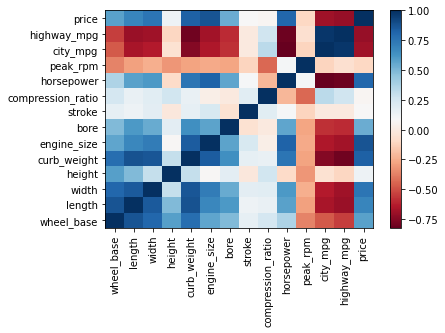

In [45]:
# printing correlation plot
fig, ax = plt.subplots()
im = ax.pcolor(dfc, cmap='RdBu')

#label names
row_labels = cont_var
col_labels = dfc.index

#move ticks and labels to the center
ax.set_xticks(np.arange(dfc.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(dfc.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

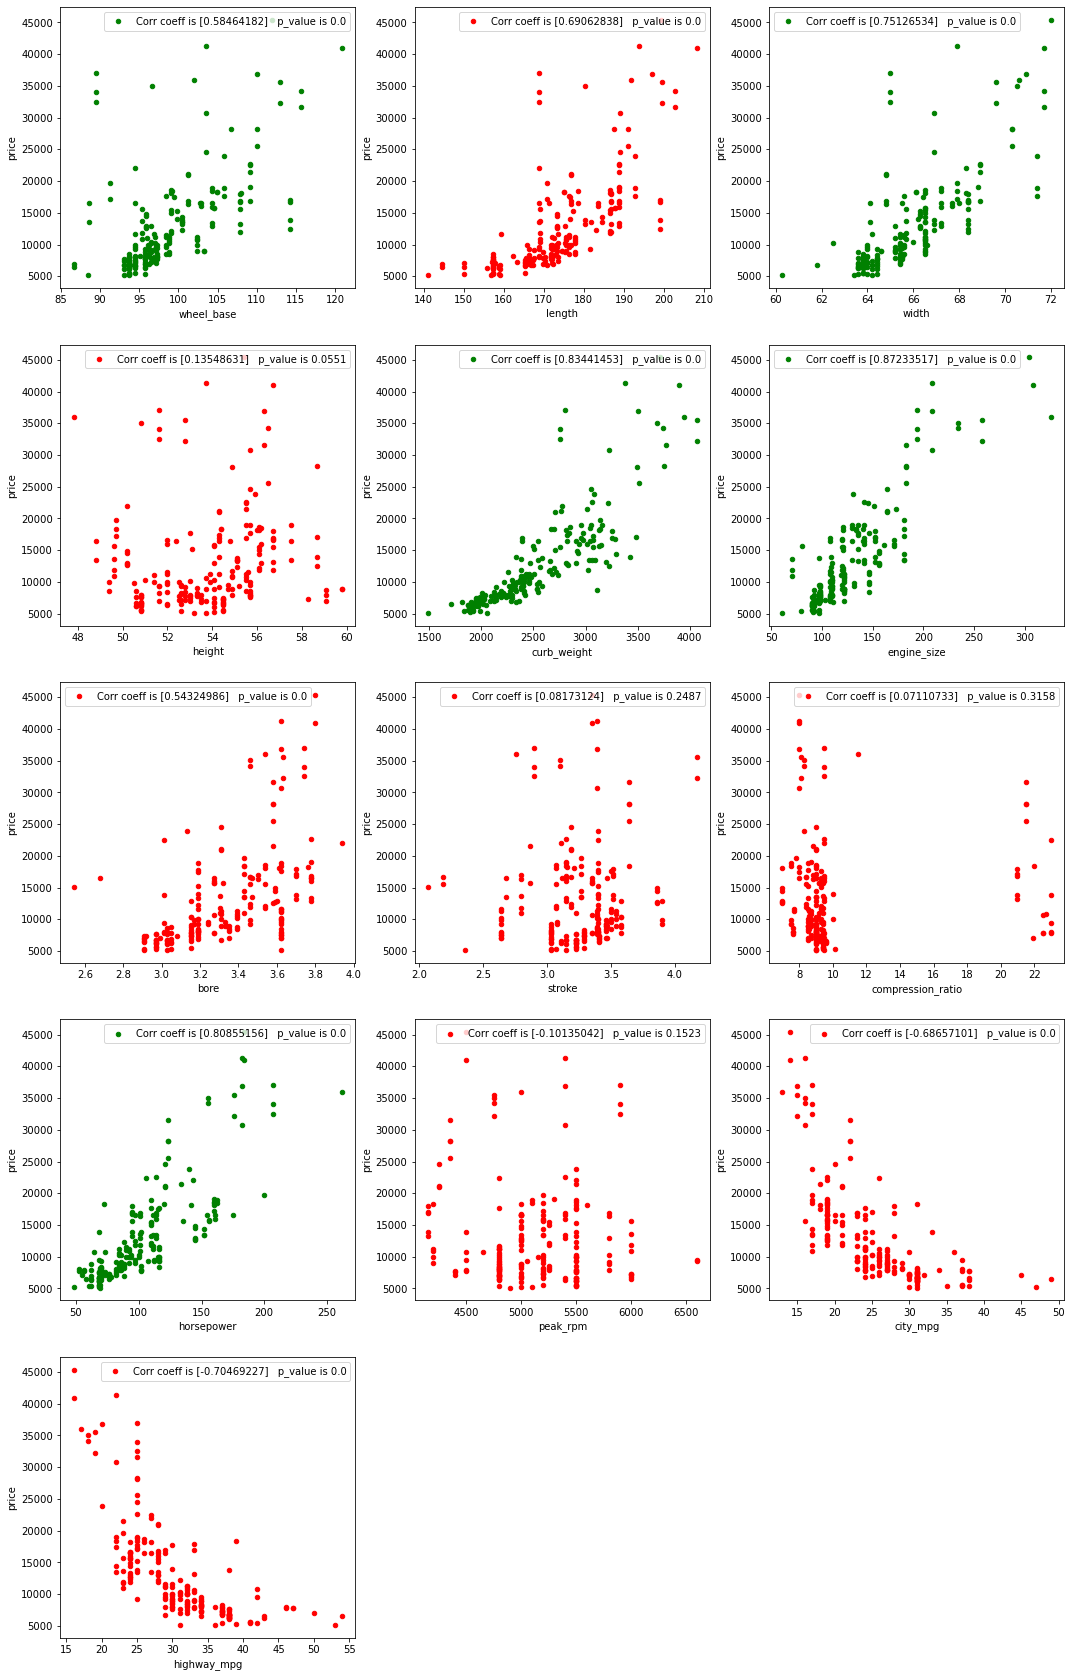

In [46]:
# a loop for printing corelation plots of different dependent variables with target variable "price" using loop
A = pd.DataFrame(dfc.iloc[13,:])
A = np.array(A)

p_table=[]
for i in range(len(cont_var)):
    pearson_coef, p_value = stats.pearsonr(df[cont_var[i]], df['price'])
    p_table.append(round(p_value,4))

fig = plt.figure() # create figure
ax1 = fig.add_subplot(5, 3, 1) 
ax2 = fig.add_subplot(5, 3, 2) 
ax3 = fig.add_subplot(5, 3, 3)
ax4 = fig.add_subplot(5, 3, 4)
ax5 = fig.add_subplot(5, 3, 5) 
ax6 = fig.add_subplot(5, 3, 6) 
ax7 = fig.add_subplot(5, 3, 7) 
ax8 = fig.add_subplot(5, 3, 8) 
ax9 = fig.add_subplot(5, 3, 9) 
ax10 = fig.add_subplot(5, 3, 10) 
ax11 = fig.add_subplot(5, 3, 11) 
ax12 = fig.add_subplot(5, 3, 12) 
ax13 = fig.add_subplot(5, 3, 13) 


a = 18
b = 30

df.plot.scatter(x=cont_var[0], y='price', color='green', label=str("Corr coeff is "+ str(A[0])+ "   p_value is " + str(p_table[0])), ax=ax1, figsize=(a,b));
df.plot.scatter(x=cont_var[1], y='price', color='red', label=str("Corr coeff is "+ str(A[1])+ "   p_value is " + str(p_table[1])), ax=ax2, figsize=(a,b));
df.plot.scatter(x=cont_var[2], y='price', color='green', label=str("Corr coeff is "+ str(A[2])+ "   p_value is " + str(p_table[2])), ax=ax3, figsize=(a,b));
df.plot.scatter(x=cont_var[3], y='price', color='red', label=str("Corr coeff is "+ str(A[3])+ "   p_value is " + str(p_table[3])), ax=ax4, figsize=(a,b));
df.plot.scatter(x=cont_var[4], y='price', color='green', label=str("Corr coeff is "+ str(A[4])+ "   p_value is " + str(p_table[4])), ax=ax5, figsize=(a,b));
df.plot.scatter(x=cont_var[5], y='price', color='green', label=str("Corr coeff is "+ str(A[5])+ "   p_value is " + str(p_table[5])), ax=ax6, figsize=(a,b));
df.plot.scatter(x=cont_var[6], y='price', color='red', label=str("Corr coeff is "+ str(A[6])+ "   p_value is " + str(p_table[6])), ax=ax7, figsize=(a,b));
df.plot.scatter(x=cont_var[7], y='price', color='red', label=str("Corr coeff is "+ str(A[7])+ "   p_value is " + str(p_table[7])), ax=ax8, figsize=(a,b));
df.plot.scatter(x=cont_var[8], y='price', color='red', label=str("Corr coeff is "+ str(A[8])+ "   p_value is " + str(p_table[8])), ax=ax9, figsize=(a,b));
df.plot.scatter(x=cont_var[9], y='price', color='green', label=str("Corr coeff is "+ str(A[9])+ "   p_value is " + str(p_table[9])), ax=ax10, figsize=(a,b));
df.plot.scatter(x=cont_var[10], y='price', color='red', label=str("Corr coeff is "+ str(A[10])+ "   p_value is " + str(p_table[10])), ax=ax11, figsize=(a,b));
df.plot.scatter(x=cont_var[11], y='price', color='red', label=str("Corr coeff is "+ str(A[11])+ "   p_value is " + str(p_table[11])), ax=ax12, figsize=(a,b));
df.plot.scatter(x=cont_var[12], y='price', color='red', label=str("Corr coeff is "+ str(A[12])+ "   p_value is " + str(p_table[12])), ax=ax13, figsize=(a,b));


### Only those scatterplots which have been shown in green are selected as important variables for Multiple Linear Regression. The criteria for selection is as follows:
<ul>
<li> The scatter plots must be approximately be linear.</li>
<li> Any curvilenear plots must be discarded. </li>
<li> A p-value less than 0.05 for significance.</li>
<li> A good correlation coefficient (i.e. not near to 0)</li></ul>

# Selection of Important Continuous Variables

Only thosecontinupus variables satisfy the above conditions can be selected as  important variables for analysis. They are as follows: <ul>
<li> "wheel_base"</li>
<li> "width"</li>
<li> "curb_weight"</li>
<li>"engine_size"</li>
<li>"bore"</li>    
<li>"horsepower"</li></ul><ul>
These continuous variables might be important predictors of "price" (target variable)</ul>

In [47]:
#The significant continuous variables are : 
sign_cont_var = ["wheel_base","width","curb_weight","engine_size","bore","horsepower"]

In [48]:
sign_var = sign_cat_var + sign_cont_var+["price"]
df_sign = df[sign_var]

In [49]:
df_sign.to_csv( "clean1_project_1.csv",header=True)